In [3]:
import xarray as xr
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt
from pyproj import CRS, Transformer
import rioxarray as xrio
import cartopy.crs as ccrs

In [41]:
ds = xr.open_dataset('../L2_HR_Raster/SWOT_L2_HR_Raster_100m_UTM30T_N_x_x_x_001_042_037F_20220402T112119_20220402T112139_Dx0000_01.nc')
cc = CRS.from_cf(ds.crs.attrs)
ds.rio.write_crs(cc.to_string(), inplace=True)
ds4326 = ds['wse'].rio.reproject("EPSG:4326")

# Zoomed out version

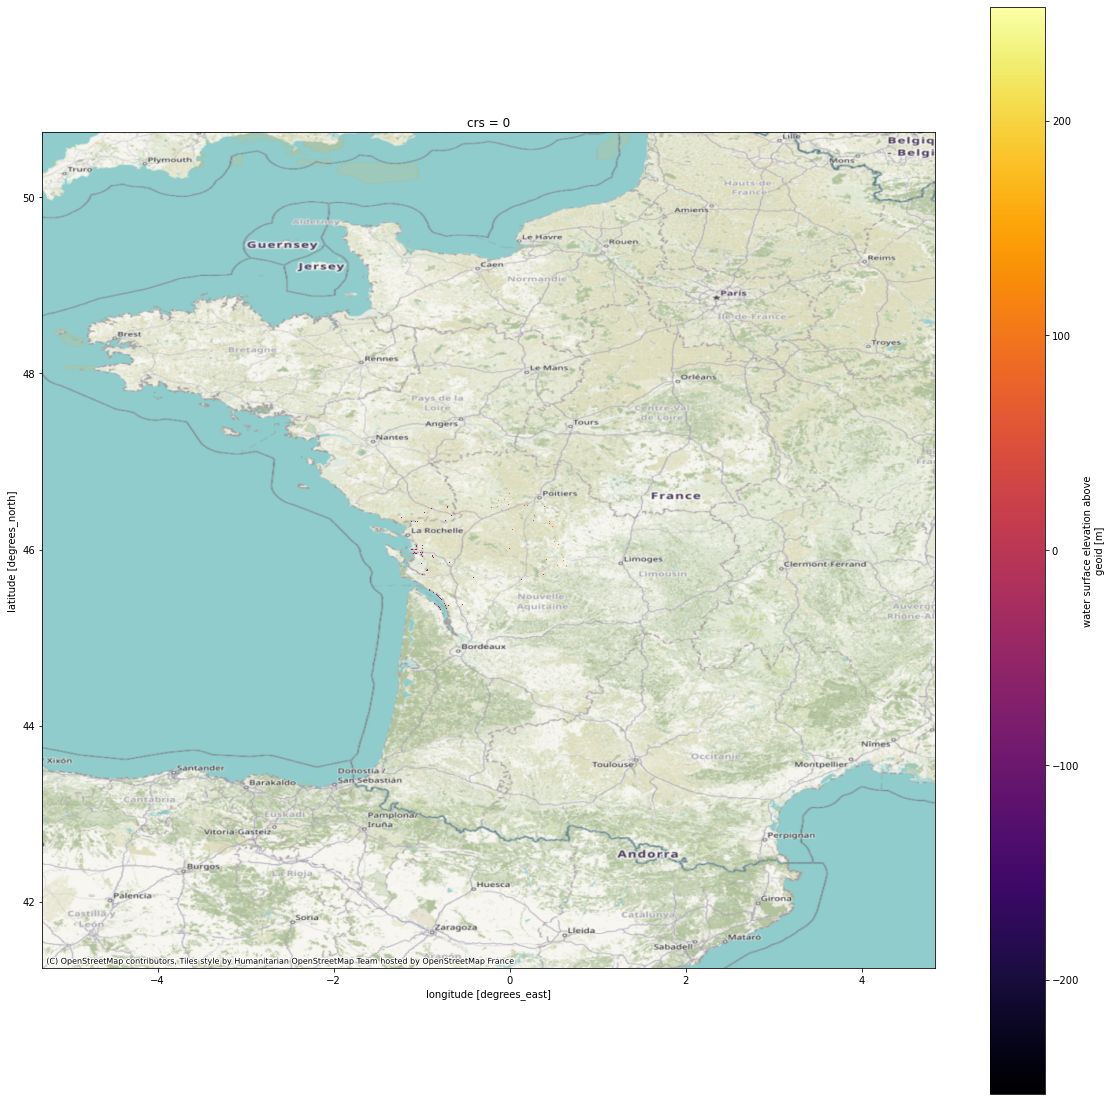

In [59]:
xpad = 4
ypad = 4

f = plt.figure(figsize=(20, 20))
ax = plt.axes()

ds4326.plot(ax=ax, cmap='inferno')

xlims = ax.get_xlim()
ylims = ax.get_ylim()
ax.set_xlim(xlims[0]-xpad, xlims[1]+xpad)
ax.set_ylim(ylims[0]-xpad, ylims[1]+xpad)

ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.OpenStreetMap.HOT)

# Zoomed in version

old lims: (xlims[0] = -1.31, xlims[1] = 0.83) (ylims[0] = 45.25, ylims[1] = 46.74)


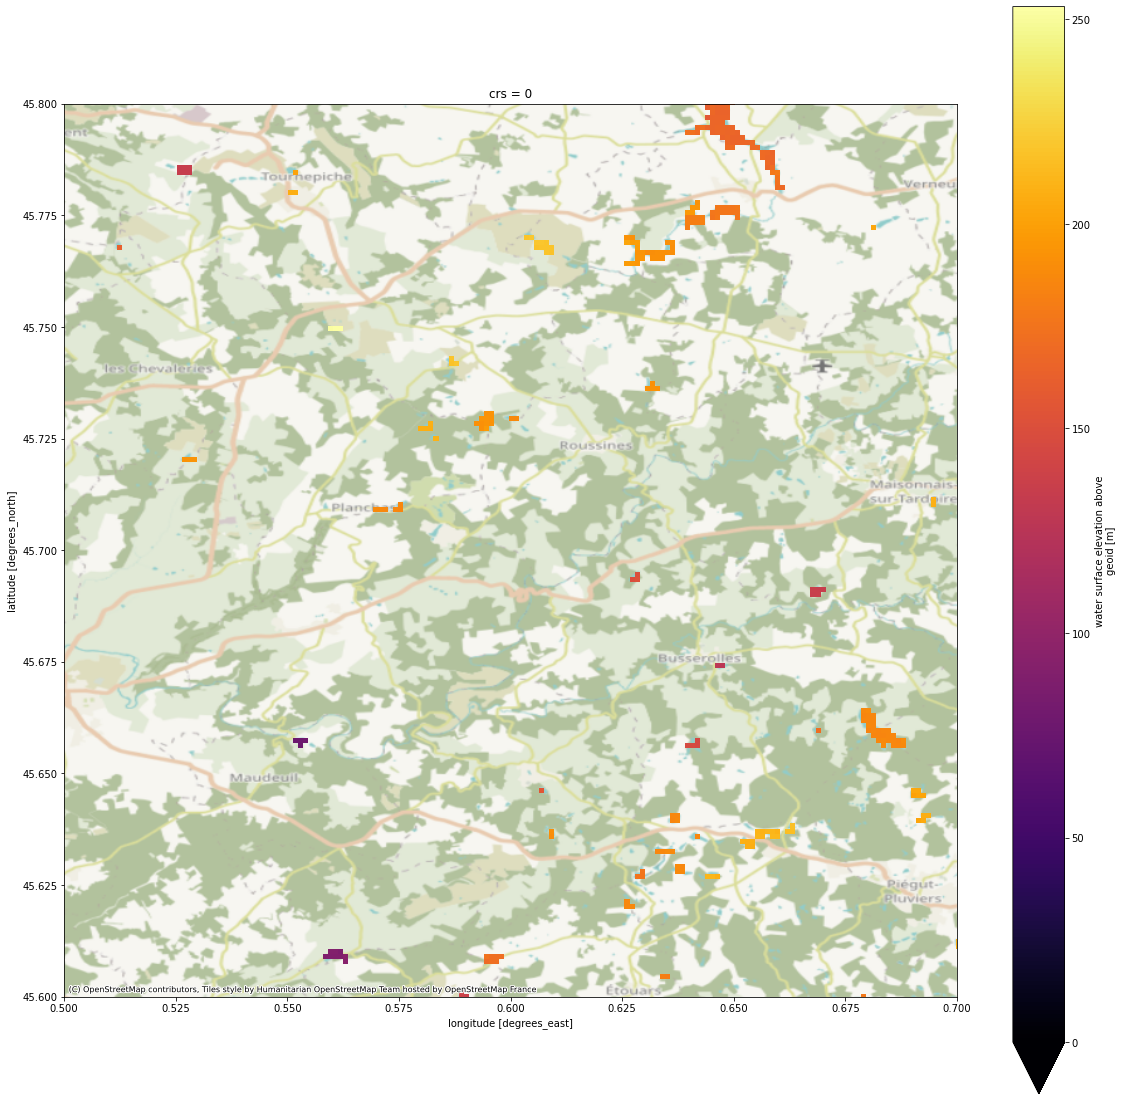

In [71]:
f = plt.figure(figsize=(20, 20))
ax = plt.axes()

ds4326.plot(ax=ax, cmap='inferno', vmin=0)

xlims = ax.get_xlim()
ylims = ax.get_ylim()

print(f"old lims: ({xlims[0] = :.2f}, {xlims[1] = :.2f})", f"({ylims[0] = :.2f}, {ylims[1] = :.2f})")

startpt = (0.5, 45.6)
extend_by = 0.2

ax.set_xlim(startpt[0], startpt[0] + extend_by)
ax.set_ylim(startpt[1], startpt[1] + extend_by)

ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.OpenStreetMap.HOT)

In [76]:
del ds4326.attrs['grid_mapping']
ds4326.rio.to_raster("../results/water_hts.tif")